# Python fundamentals part 2

- error handling 
    - try-except
    - different types of errors
- file handling
- functions
- matplotlib
- numpy 

## Error handling
- syntax error
- runtime errors (exceptions)
- logical error

### Syntax error

In [2]:
prin("linear regression is a supervised learning algorithm")

NameError: name 'prin' is not defined

In [3]:
print("linear regression is a supervised learning algorithm")

linear regression is a supervised learning algorithm


### Runtime error

In [4]:
# [0,1,2,3,4]
numbers = list(range(5))

numbers[5]

IndexError: list index out of range

### Logical error
- can be hard to detect

In [6]:
import numpy as np
radius = 5

# circle area is actually pi*r^2
circle_area = np.pi*radius
print(f"{circle_area = :.2f} area units")

circle_area = 15.71 area units


### try-except

In [9]:
age = float(input("Enter your age: "))

print(age)

37.0


In [13]:
age = float(input("Enter your age: "))
if not 0 <= age <= 125:
    raise ValueError(f"You entered {age}, age must be between 0 and 125")

ValueError: You entered -25.0, age must be between 0 and 125

In [12]:
age = float(input("Enter your age: "))
if not 0 <= age <= 125:
    raise ValueError(f"You entered {age}, age must be between 0 and 125")

In [16]:
while True:
    try:
        age = float(input("Enter your age: "))
        if not 0 <= age <= 125:
            raise ValueError(f"You entered {age}, age must be between 0 and 125")
        print(f"You are {age} years old")
        break
    except ValueError as err:
        print(err)

You entered -22.0, age must be between 0 and 125
You entered 145.0, age must be between 0 and 125
You entered 987.0, age must be between 0 and 125
You are 37.0 years old


## Functions

- Reuse Code
- Organize Code
- Increase Readability
- Modular Code
- DRY (Don't Reapeat Yourself)

In [20]:
# number is input parameter
def cuber(number):
    # ** = raise by x
    return number**3

# call the function cuber with input argument 2
cuber(2)


8

In [21]:
cubes = [cuber(number) for number in range(5)]
cubes

[0, 1, 8, 27, 64]

In [22]:
for i in range (1, 5):
    print(i*"x" )

x
xx
xxx
xxxx


In [28]:
# void function - returns None, but has a side effect by printing
def draw_ascii_triangle(number_rows):
    for i in range (1, number_rows+1):
        print(i*"x ")

draw_ascii_triangle(5)

x 
x x 
x x x 
x x x x 
x x x x x 


In [30]:
# 10 overwrites the default value of 5
draw_ascii_triangle(10)

x 
x x 
x x x 
x x x x 
x x x x x 
x x x x x x 
x x x x x x x 
x x x x x x x x 
x x x x x x x x x 
x x x x x x x x x x 


### Arbitrary arguments, *args

- arbitrary number of positional arguments

In [46]:
def average(*numbers):
    sum_ = 0
    for number in numbers:
        sum_ += number

        return sum_/len(numbers)
# (1+2+3)/3 
average(1,2,3)

0.3333333333333333

In [33]:
average(1,2,34,5,12,51,23,34)

0.125

### Keyword arguments, **kwargs

In [41]:
def simulate_dices(throws=1, dices=2):
    return np.random.randint(1,7, size=(throws, dices))

simulate_dices()

array([[1, 5]])

In [42]:
simulate_dices(5,2)

array([[6, 2],
       [3, 1],
       [6, 6],
       [1, 5],
       [2, 4]])

In [43]:
simulate_dices(throws=6, dices=4).shape

(6, 4)

In [44]:
simulate_dices(dices=3)

array([[3, 5, 5]])

### Lambda functions

- anonymous functions
_can be used inside other functions -> higher order functions

In [47]:
cuber = lambda x: x**3

cuber(5)

125

## Matplotlib

x = (-5, -4, -3, -2, -1, 0, 1, 2, 3, 4)
y = [-17, -14, -11, -8, -5, -2, 1, 4, 7, 10]
y2 = [23, 14, 7, 2, -1, -2, -1, 2, 7, 14]


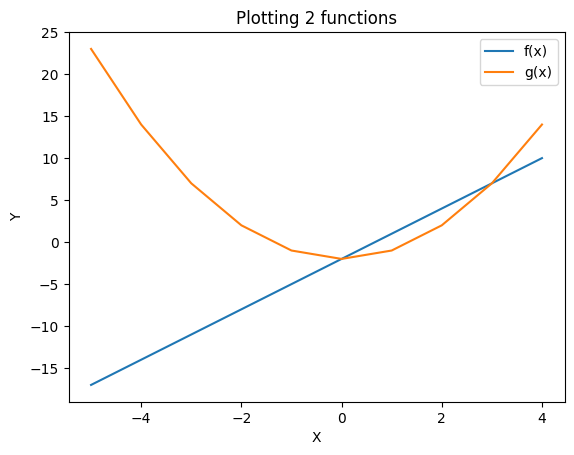

In [53]:
import matplotlib.pyplot as plt

f = lambda x: 3 * x - 2

def g(x):
    return x**2 - 2

# similar to list but immutable, i.e. can't change values in a tuple
x = tuple(range(-5,5))
print(f"{x = }")

y = [f(i) for i in x]
y2 = [g(i) for i in x]

print(f"{y = }")
print(f"{y2 = }")

plt.plot(x, y)
plt.plot(x, y2)
plt.title("Plotting 2 functions")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["f(x)", "g(x)"])

## Plot with numpy

In [54]:
import numpy as np

x = np.linspace(-5,5)
x

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

In [55]:
x.shape

(50,)

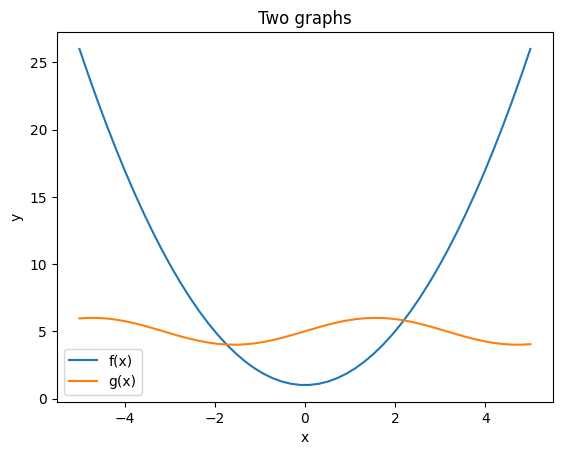

In [59]:
f = lambda x: x**2 + 1
g = lambda x: np.sin(x) + 5

# OOP approach
fig, ax = plt.subplots(1)

ax.plot(x, f(x), label="f(x)")
ax.plot(x, g(x), label="g(x)")
ax.set(title="Two graphs", xlabel="x", ylabel="y")
ax.legend()

## More on numpy

In [63]:
vector1 = np.array( [2,5,1])
print(f"{vector1 = }")

# elementwise multiplication
vector1 * 3

vector1 = array([2, 5, 1])


array([ 6, 15,  3])

In [62]:
# elementwise addition
vector1 + 3

array([5, 8, 4])

In [64]:
[2,5,1] + 3

TypeError: can only concatenate list (not "int") to list

In [65]:
# the list copies three times and concatenates
[2,5,1]*3

[2, 5, 1, 2, 5, 1, 2, 5, 1]

In [66]:
vector1.sum()

8

In [67]:
vector1.shape

(3,)

In [68]:
vector1[-1]

1

### Performance

In [69]:
%%timeit
import random as rnd

number_dices = 1000000
[rnd.randint(1,6) for _ in range(number_dices)]

439 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [70]:
%%timeit
number_dices = 1000000
np.random.randint(1,7, number_dices)

9.07 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [72]:
439/7,3

(62.714285714285715, 3)